In [1071]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras

In [1072]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1073]:
bike_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/3yrs_Bike_data.csv')
bike_df.head()

,New_time_format_BIXI,Working_day,week_day,Hours,temp_celcius,dew_pt_celcius,rel_humidity,wind_dir,wind_speed,stn_press,Count,month,Years
0,2017-04-15 00,0,6,0,11.4,-5.4,30,27,8,101.76,144,4,2017
1,2017-04-15 01,0,6,1,10.8,-6.2,30,27,9,101.70,76,4,2017
2,2017-04-15 02,0,6,2,10.9,-6.3,29,27,11,101.65,39,4,2017
3,2017-04-15 03,0,6,3,10.2,-6.0,31,27,9,101.61,40,4,2017
4,2017-04-15 04,0,6,4,8.4,-4.3,40,20,4,101.58,12,4,2017


In [1074]:
bike_df.describe()

,Working_day,week_day,Hours,temp_celcius,dew_pt_celcius,rel_humidity,wind_dir,wind_speed,stn_press,Count,month,Years
count,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000
mean,0.714391,3.990772,11.503879,16.067875,8.966464,65.646783,18.775512,6.182493,100.626652,1022.998729,7.343253,2017.964892
std,0.451719,2.002919,6.926563,7.405918,7.383633,18.602370,10.299778,2.907672,0.724800,893.835045,2.032786,0.804030
min,0.000000,1.000000,0.000000,-10.700000,-19.300000,14.000000,0.000000,1.000000,96.820000,3.000000,4.000000,2017.000000
25%,0.000000,2.000000,5.000000,10.900000,4.200000,52.000000,13.000000,4.000000,100.160000,262.000000,6.000000,2017.000000
50%,1.000000,4.000000,12.000000,16.800000,9.600000,66.000000,20.000000,6.000000,100.600000,833.500000,7.000000,2018.000000
75%,1.000000,6.000000,18.000000,21.700000,14.600000,81.000000,26.000000,8.000000,101.080000,1527.000000,9.000000,2019.000000
max,1.000000,7.000000,23.000000,35.800000,24.300000,100.000000,36.000000,25.000000,102.830000,4921.000000,11.000000,2019.000000


In [1075]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14954 entries, 0 to 14953
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   New_time_format_BIXI  14954 non-null  object 
 1   Working_day           14954 non-null  int64  
 2   week_day              14954 non-null  int64  
 3   Hours                 14954 non-null  int64  
 4   temp_celcius          14954 non-null  float64
 5   dew_pt_celcius        14954 non-null  float64
 6   rel_humidity          14954 non-null  int64  
 7   wind_dir              14954 non-null  int64  
 8   wind_speed            14954 non-null  int64  
 9   stn_press             14954 non-null  float64
 10  Count                 14954 non-null  int64  
 11  month                 14954 non-null  int64  
 12  Years                 14954 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1.5+ MB


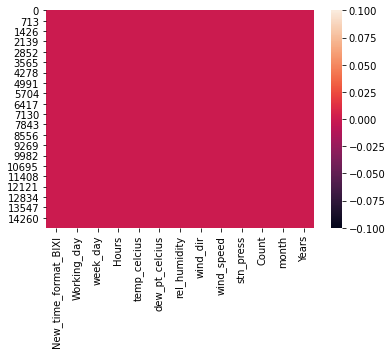

In [1076]:
sns.heatmap(bike_df.isnull())

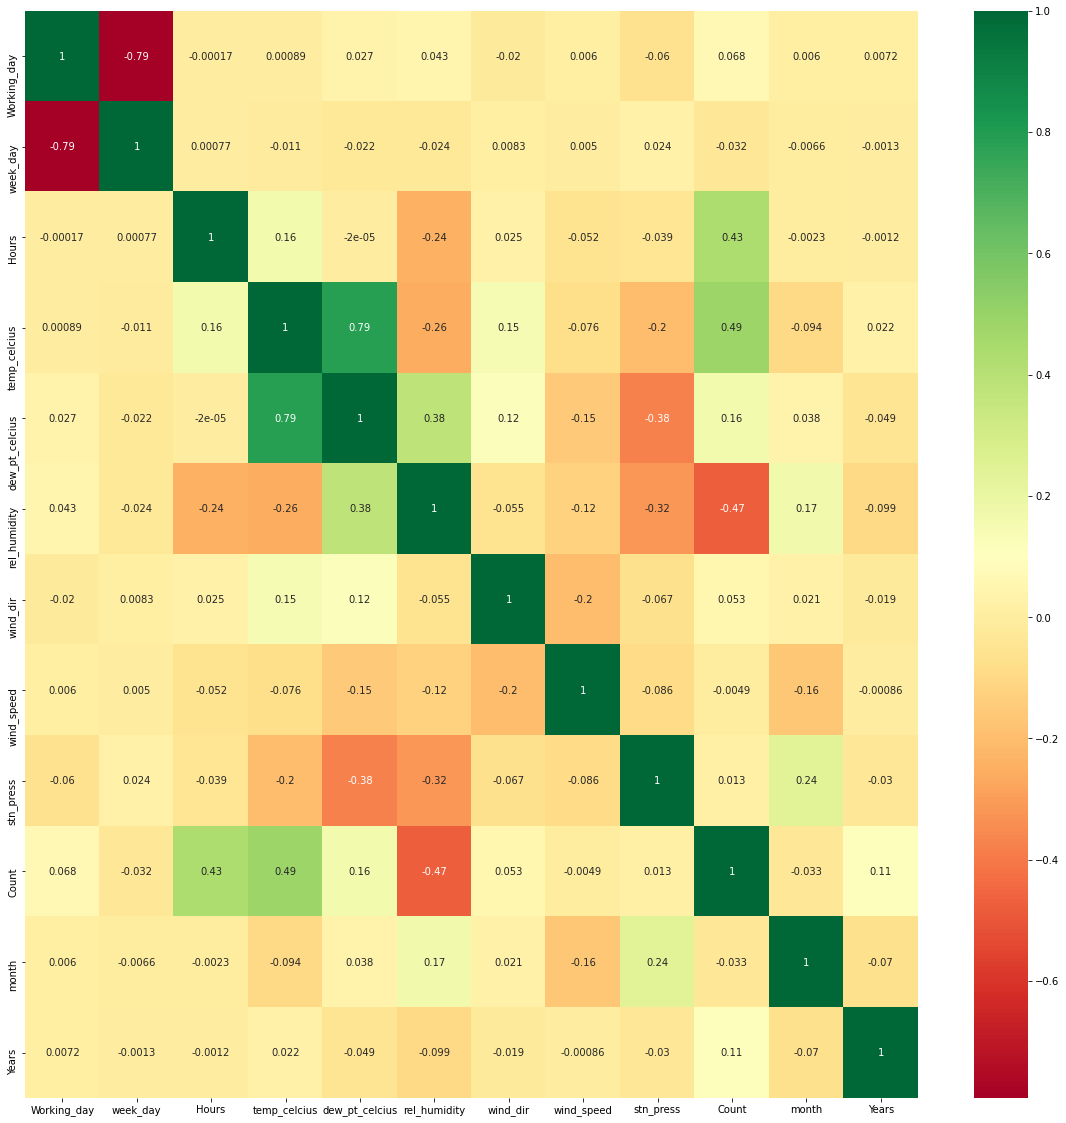

In [1077]:
corrmat=bike_df.corr() 
top_corr_features=corrmat.index 
plt.figure(figsize=(20,20)) 
#plot heat map 
g=sns.heatmap(bike_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#sns.heatmap(flight.corr(), annot = True)

In [1078]:
bike_df.describe(include='all').loc['unique', :]

New_time_format_BIXI    14954
Working_day               NaN
week_day                  NaN
Hours                     NaN
temp_celcius              NaN
dew_pt_celcius            NaN
rel_humidity              NaN
wind_dir                  NaN
wind_speed                NaN
stn_press                 NaN
Count                     NaN
month                     NaN
Years                     NaN
Name: unique, dtype: object

In [1079]:
bike_df = bike_df.rename(columns={'New_time_format_BIXI': 'start_date'})

In [1080]:
bike_df.stn_press.nunique()

470

In [1081]:
bike_df

,start_date,Working_day,week_day,Hours,temp_celcius,dew_pt_celcius,rel_humidity,wind_dir,wind_speed,stn_press,Count,month,Years
0,2017-04-15 00,0,6,0,11.4,-5.4,30,27,8,101.76,144,4,2017
1,2017-04-15 01,0,6,1,10.8,-6.2,30,27,9,101.70,76,4,2017
2,2017-04-15 02,0,6,2,10.9,-6.3,29,27,11,101.65,39,4,2017
3,2017-04-15 03,0,6,3,10.2,-6.0,31,27,9,101.61,40,4,2017
4,2017-04-15 04,0,6,4,8.4,-4.3,40,20,4,101.58,12,4,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14949,2019-10-31 19,1,4,19,12.3,11.9,97,1,12,98.66,166,10,2019
14950,2019-10-31 20,1,4,20,10.3,9.8,97,1,13,98.60,133,10,2019
14951,2019-10-31 21,1,4,21,9.2,8.7,97,3,15,98.60,119,10,2019
14952,2019-10-31 22,1,4,22,8.5,7.9,96,2,11,98.47,121,10,2019


In [1082]:
bike_df.start_date = pd.to_datetime(bike_df.start_date) # format='%m/%d/%Y'
bike_df.index = pd.DatetimeIndex(bike_df.start_date)

In [1083]:
bike_df

,start_date,Working_day,week_day,Hours,temp_celcius,dew_pt_celcius,rel_humidity,wind_dir,wind_speed,stn_press,Count,month,Years
start_date,,,,,,,,,,,,,
2017-04-15 00:00:00,2017-04-15 00:00:00,0,6,0,11.4,-5.4,30,27,8,101.76,144,4,2017
2017-04-15 01:00:00,2017-04-15 01:00:00,0,6,1,10.8,-6.2,30,27,9,101.70,76,4,2017
2017-04-15 02:00:00,2017-04-15 02:00:00,0,6,2,10.9,-6.3,29,27,11,101.65,39,4,2017
2017-04-15 03:00:00,2017-04-15 03:00:00,0,6,3,10.2,-6.0,31,27,9,101.61,40,4,2017
2017-04-15 04:00:00,2017-04-15 04:00:00,0,6,4,8.4,-4.3,40,20,4,101.58,12,4,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-31 19:00:00,2019-10-31 19:00:00,1,4,19,12.3,11.9,97,1,12,98.66,166,10,2019
2019-10-31 20:00:00,2019-10-31 20:00:00,1,4,20,10.3,9.8,97,1,13,98.60,133,10,2019
2019-10-31 21:00:00,2019-10-31 21:00:00,1,4,21,9.2,8.7,97,3,15,98.60,119,10,2019


In [1084]:
bike_df = bike_df.drop(labels = ['start_date'], axis=1)

In [1085]:
#bike_df

In [1086]:
#group data into hourly records using mean and modes

#start_date        291692
#Working_day          NaN
#week_day             NaN
#Hours                NaN
#temp_celcius         NaN
#dew_pt_celcius       NaN
#rel_humidity         NaN
#wind_dir             NaN
#wind_speed           NaN
#stn_press            NaN
#Count                NaN
#month                NaN
#Years   

 
def grp(x):
    d = {}
    d['Working_day'] = x['Working_day'].agg(lambda x:x.value_counts().index[0])
    d['week_day'] = x['week_day'].agg(lambda x:x.value_counts().index[0])
    d['Hours'] = x['Hours'].agg(lambda x:x.value_counts().index[0])
    d['temp_celcius'] = x['temp_celcius'].min()
    d['dew_pt_celcius'] = x['dew_pt_celcius'].min()
    d['rel_humidity'] = x['rel_humidity'].mean()
    d['wind_dir'] = x['wind_dir'].agg(lambda x:x.value_counts().index[0])
    d['wind_speed'] = x['wind_speed'].agg(lambda x:x.value_counts().index[0])
    d['stn_press'] = x['stn_press'].agg(lambda x:x.value_counts().index[0])
    d['Count'] = x['Count'].sum()
    d['month'] = x['month'].agg(lambda x:x.value_counts().index[0])
    d['Years'] = x['Years'].agg(lambda x:x.value_counts().index[0])
    return pd.Series(d, index=['Working_day', 'week_day','Hours',  'temp_celcius',
    'dew_pt_celcius','rel_humidity', 'wind_dir', 'wind_speed', 'month', 'Years', 'stn_press','Count'])



In [1087]:
#bike_df['start_date'] = bike_df['start_date'].dt.floor('h')

In [1088]:
bike_df.head()

,Working_day,week_day,Hours,temp_celcius,dew_pt_celcius,rel_humidity,wind_dir,wind_speed,stn_press,Count,month,Years
start_date,,,,,,,,,,,,
2017-04-15 00:00:00,0,6,0,11.4,-5.4,30,27,8,101.76,144,4,2017
2017-04-15 01:00:00,0,6,1,10.8,-6.2,30,27,9,101.70,76,4,2017
2017-04-15 02:00:00,0,6,2,10.9,-6.3,29,27,11,101.65,39,4,2017
2017-04-15 03:00:00,0,6,3,10.2,-6.0,31,27,9,101.61,40,4,2017
2017-04-15 04:00:00,0,6,4,8.4,-4.3,40,20,4,101.58,12,4,2017


In [1089]:
#bike_df.reset_index(inplace=True)

In [1090]:
#bike_new = bike_df.groupby(['start_date']).apply(grp)

In [1091]:
bike_new = bike_df

In [1092]:
#bike_new = bike_new.drop(labels = ['start_date'], axis=1)

In [1093]:
bike_new.head()

,Working_day,week_day,Hours,temp_celcius,dew_pt_celcius,rel_humidity,wind_dir,wind_speed,stn_press,Count,month,Years
start_date,,,,,,,,,,,,
2017-04-15 00:00:00,0,6,0,11.4,-5.4,30,27,8,101.76,144,4,2017
2017-04-15 01:00:00,0,6,1,10.8,-6.2,30,27,9,101.70,76,4,2017
2017-04-15 02:00:00,0,6,2,10.9,-6.3,29,27,11,101.65,39,4,2017
2017-04-15 03:00:00,0,6,3,10.2,-6.0,31,27,9,101.61,40,4,2017
2017-04-15 04:00:00,0,6,4,8.4,-4.3,40,20,4,101.58,12,4,2017


In [1094]:
#Use Time Series on the Count 
time_step = bike_new.index
count = bike_new.values[:, -3]

series = pd.Series(data = count, index=time_step)
series = series[~series.index.duplicated(keep='first')]
time = np.array(time_step)


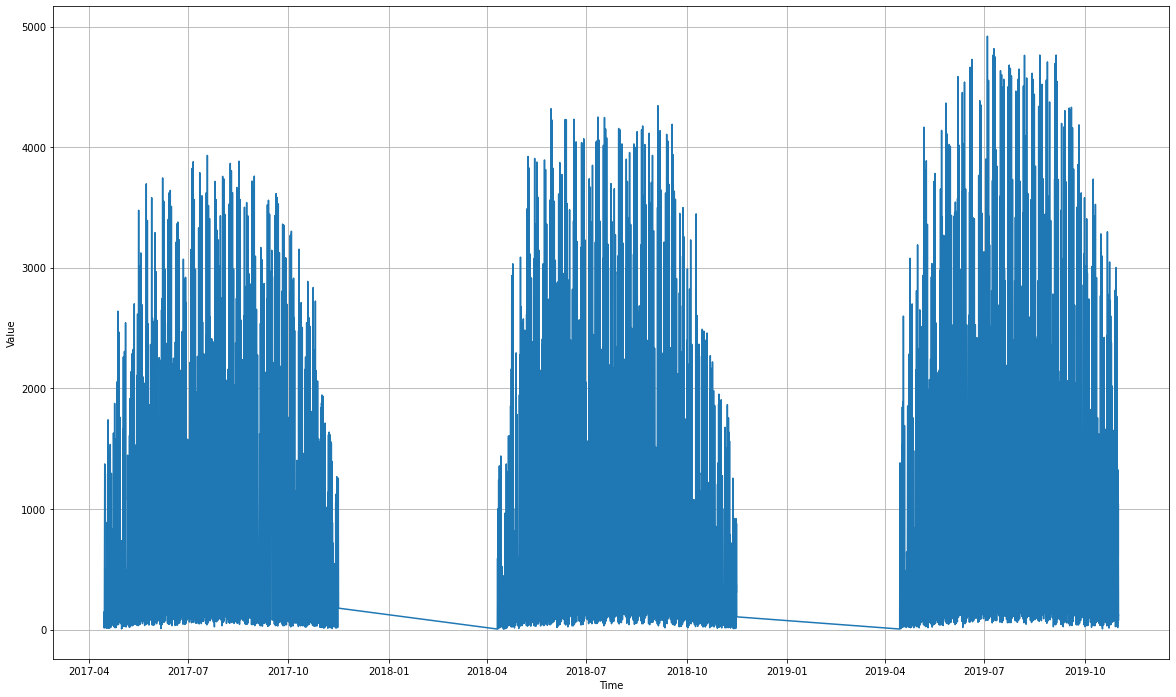

In [1095]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

plt.figure(figsize=(20, 12))
plot_series(time, series)
plt.savefig('Time_Series_Hourly.png')

In [1096]:
#plt.savefig('Time_Series_Hourly.png')

In [1097]:
#sns.pairplot(bike_new)

In [1098]:
bike_new['Hours'] = bike_new['Hours'].astype(pd.np.int64)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


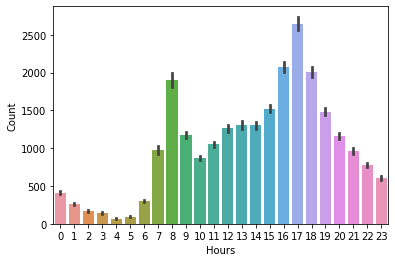

In [1099]:
#Bike usage throughout the day

sns.barplot(x="Hours", y="Count", data=bike_new)

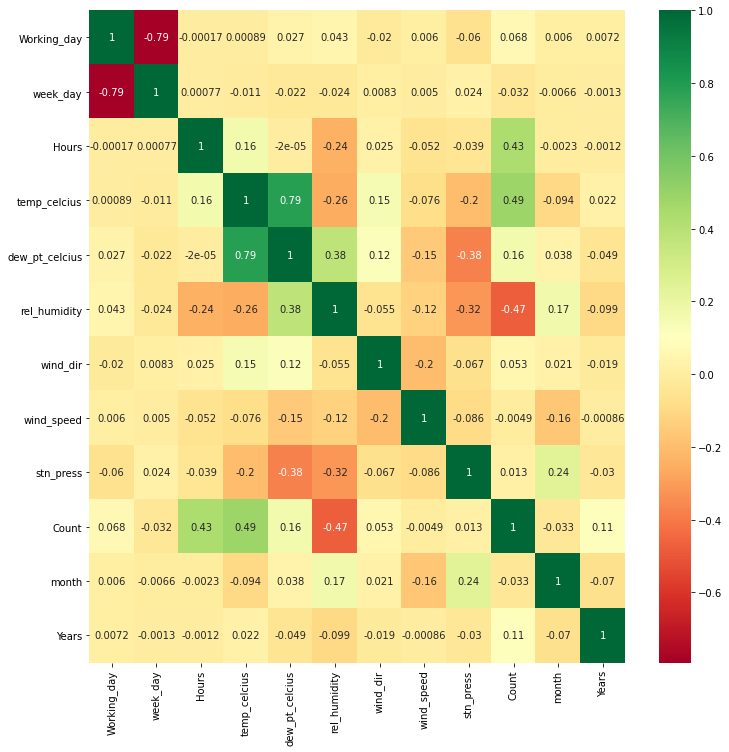

In [1100]:
#See correlation Matrix

corrmat=bike_new.corr() 
top_corr_features=corrmat.index 
plt.figure(figsize=(12,12)) 
#plot heat map 
g=sns.heatmap(bike_new[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#sns.heatmap(flight.corr(), annot = True)

##Split Data for trainig and testing the Model

In [1101]:
bike_new.head()

,Working_day,week_day,Hours,temp_celcius,dew_pt_celcius,rel_humidity,wind_dir,wind_speed,stn_press,Count,month,Years
start_date,,,,,,,,,,,,
2017-04-15 00:00:00,0,6,0,11.4,-5.4,30,27,8,101.76,144,4,2017
2017-04-15 01:00:00,0,6,1,10.8,-6.2,30,27,9,101.70,76,4,2017
2017-04-15 02:00:00,0,6,2,10.9,-6.3,29,27,11,101.65,39,4,2017
2017-04-15 03:00:00,0,6,3,10.2,-6.0,31,27,9,101.61,40,4,2017
2017-04-15 04:00:00,0,6,4,8.4,-4.3,40,20,4,101.58,12,4,2017


In [1102]:
#feature Engineering

X = bike_new.drop(['Count'], axis=1)
X.shape

(14954, 11)

In [1103]:
y=bike_new['Count']

In [1104]:
from sklearn.ensemble import ExtraTreesRegressor
#import matplotlib.pyplot as plt
model_h = ExtraTreesRegressor()
model_h.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [1105]:
print(model_h.feature_importances_)

[0.05791332 0.0188105  0.57268151 0.13716078 0.02153227 0.11979793
 0.00814158 0.00785965 0.01045734 0.02600587 0.01963925]


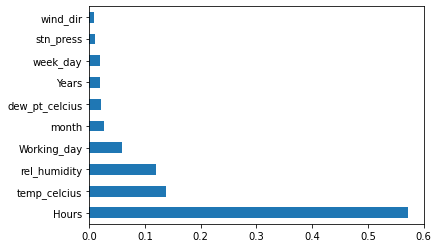

In [1106]:
#Features with most importance ('Hours' column is the most important feature in relation to the 'Count')

feat_importance = pd.Series(model_h.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

In [1107]:
# 
#Categorical features

Xcat = bike_new[['Working_day', 'Hours', 'month','week_day']]
#Xcat

In [1108]:
Xynum = bike_new[['temp_celcius',	'dew_pt_celcius',	'rel_humidity', 'Years',	'Count']]

In [1109]:
Xynum

,temp_celcius,dew_pt_celcius,rel_humidity,Years,Count
start_date,,,,,
2017-04-15 00:00:00,11.4,-5.4,30,2017,144
2017-04-15 01:00:00,10.8,-6.2,30,2017,76
2017-04-15 02:00:00,10.9,-6.3,29,2017,39
2017-04-15 03:00:00,10.2,-6.0,31,2017,40
2017-04-15 04:00:00,8.4,-4.3,40,2017,12
...,...,...,...,...,...
2019-10-31 19:00:00,12.3,11.9,97,2019,166
2019-10-31 20:00:00,10.3,9.8,97,2019,133
2019-10-31 21:00:00,9.2,8.7,97,2019,119


In [1110]:
#Onehotencode the categorical data
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
Xcat = onehotencoder.fit_transform(Xcat).toarray()

Xcat

array([[1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [1111]:
Xcat.shape

(14954, 41)

In [1112]:
Xynum = Xynum.reset_index()

In [1113]:
Xcat = pd.DataFrame(Xcat)

bike_all = pd.concat([Xcat, Xynum], axis=1)

In [1114]:
bike_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,start_date,temp_celcius,dew_pt_celcius,rel_humidity,Years,Count
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2017-04-15 00:00:00,11.4,-5.4,30,2017,144
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2017-04-15 01:00:00,10.8,-6.2,30,2017,76
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2017-04-15 02:00:00,10.9,-6.3,29,2017,39
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2017-04-15 03:00:00,10.2,-6.0,31,2017,40
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2017-04-15 04:00:00,8.4,-4.3,40,2017,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14949,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2019-10-31 19:00:00,12.3,11.9,97,2019,166
14950,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2019-10-31 20:00:00,10.3,9.8,97,2019,133
14951,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2019-10-31 21:00:00,9.2,8.7,97,2019,119
14952,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2019-10-31 22:00:00,8.5,7.9,96,2019,121


In [1115]:
bike_all = bike_all.drop(['start_date'], axis = 1)

In [1116]:
bike_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,temp_celcius,dew_pt_celcius,rel_humidity,Years,Count
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.4,-5.4,30,2017,144
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.8,-6.2,30,2017,76
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.9,-6.3,29,2017,39
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.2,-6.0,31,2017,40
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.4,-4.3,40,2017,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14949,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12.3,11.9,97,2019,166
14950,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10.3,9.8,97,2019,133
14951,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.2,8.7,97,2019,119
14952,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.5,7.9,96,2019,121


In [1117]:
#Split the data before normalising and re-joining the features

In [1118]:
X_set = bike_all.iloc[:, :-1].values
Y_set = bike_all.iloc[:, -1:].values

In [1119]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_set, Y_set, test_size = 0.2)

In [1120]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((11963, 45), (2991, 45), (11963, 1), (2991, 1))

In [1121]:
X_train

array([[ 0.000e+00,  1.000e+00,  0.000e+00, ...,  3.700e+00,  4.900e+01,
         2.019e+03],
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  1.310e+01,  4.900e+01,
         2.017e+03],
       [ 0.000e+00,  1.000e+00,  0.000e+00, ...,  8.500e+00,  8.400e+01,
         2.018e+03],
       ...,
       [ 1.000e+00,  0.000e+00,  0.000e+00, ..., -9.400e+00,  6.000e+01,
         2.018e+03],
       [ 0.000e+00,  1.000e+00,  0.000e+00, ...,  1.570e+01,  6.000e+01,
         2.018e+03],
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  4.400e+00,  9.300e+01,
         2.018e+03]])

In [1122]:
X_trainN = X_train[:, -4:]


In [1123]:
X_testN = X_test[:, -4:]

In [1124]:
X_testN

array([[  26.6,   14.6,   48. , 2019. ],
       [  13.5,    5.6,   59. , 2019. ],
       [  12.3,    4. ,   57. , 2019. ],
       ...,
       [  27.3,   17.4,   55. , 2017. ],
       [  21.5,   14.7,   65. , 2017. ],
       [  19.3,   16.2,   82. , 2017. ]])

In [1125]:
#Normalize 'X features' yet to be normalised (X_trainN, X_testN) as well as the target feature 'Y'
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_trainN = scaler.fit_transform(X_trainN)
X_testN = scaler.fit_transform(X_testN)
Y_train = scaler.fit_transform(Y_train)
Y_test = scaler.fit_transform(Y_test)

In [1126]:
#Replace Normalised features in the train set

X_train = np.delete(X_train, np.s_[-4:], 1)
X_train = np.concatenate((X_train, X_trainN), axis=1)

X_test = np.delete(X_test, np.s_[-4:], 1)
X_test = np.concatenate((X_test, X_testN), axis=1)

In [1127]:
X_train.shape, X_test.shape

((11963, 45), (2991, 45))

In [1128]:
X_train

array([[0.        , 1.        , 0.        , ..., 0.52314815, 0.40697674,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.74074074, 0.40697674,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.63425926, 0.81395349,
        0.5       ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.21990741, 0.53488372,
        0.5       ],
       [0.        , 1.        , 0.        , ..., 0.80092593, 0.53488372,
        0.5       ],
       [1.        , 0.        , 0.        , ..., 0.53935185, 0.91860465,
        0.5       ]])

In [1129]:
X_test

array([[0.        , 1.        , 0.        , ..., 0.78110599, 0.36585366,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.57373272, 0.5       ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.53686636, 0.47560976,
        1.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.84562212, 0.45121951,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.78341014, 0.57317073,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.81797235, 0.7804878 ,
        0.        ]])

###**Summary of what been done so far:**
- Obtained Data
- Group data into hourly records (shrunk to 5220 instances)
- Visualised data to identify correlations and important features
- Clean and split data for model training
- Onehotencoding for categorical features 
- Normalise some of the features that needs to be normalised from the numerical features
- Join all the preprocessed features together ready for training


##Build the NN Model

In [1130]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=1000, activation='relu', input_shape=(45, )))
model.add(tf.keras.layers.Dense(units=1000, activation='relu'))
model.add(tf.keras.layers.Dense(units=800, activation='relu'))
model.add(tf.keras.layers.Dense(units=400, activation='relu'))
model.add(tf.keras.layers.Dense(units=200, activation='relu'))
model.add(tf.keras.layers.Dense(units=200, activation='relu'))
model.add(tf.keras.layers.Dropout(.1))
model.add(tf.keras.layers.Dense(units=50, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [1131]:
model.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_292 (Dense)            (None, 1000)              46000     
_________________________________________________________________
dense_293 (Dense)            (None, 1000)              1001000   
_________________________________________________________________
dense_294 (Dense)            (None, 800)               800800    
_________________________________________________________________
dense_295 (Dense)            (None, 400)               320400    
_________________________________________________________________
dense_296 (Dense)            (None, 200)               80200     
_________________________________________________________________
dense_297 (Dense)            (None, 200)               40200     
_________________________________________________________________
dropout_20 (Dropout)         (None, 200)             

In [1132]:
from tensorflow import keras
from tensorflow.keras import layers

opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer= opt, loss='mean_squared_error', metrics='mae')

history = model.fit(X_train, Y_train, epochs = 35, validation_split=0.2, batch_size=20)


Epoch 1/35
479/479 [==============================] - 2s 3ms/step - loss: 0.0194 - mae: 0.0880 - val_loss: 0.0029 - val_mae: 0.0345
Epoch 2/35
479/479 [==============================] - 1s 3ms/step - loss: 0.0034 - mae: 0.0383 - val_loss: 0.0028 - val_mae: 0.0343
Epoch 3/35
479/479 [==============================] - 1s 3ms/step - loss: 0.0029 - mae: 0.0348 - val_loss: 0.0024 - val_mae: 0.0314
Epoch 4/35
479/479 [==============================] - 1s 3ms/step - loss: 0.0026 - mae: 0.0324 - val_loss: 0.0025 - val_mae: 0.0315
Epoch 5/35
479/479 [==============================] - 1s 3ms/step - loss: 0.0025 - mae: 0.0323 - val_loss: 0.0024 - val_mae: 0.0308
Epoch 6/35
479/479 [==============================] - 1s 3ms/step - loss: 0.0024 - mae: 0.0309 - val_loss: 0.0027 - val_mae: 0.0335
Epoch 7/35
479/479 [==============================] - 1s 3ms/step - loss: 0.0026 - mae: 0.0321 - val_loss: 0.0024 - val_mae: 0.0302
Epoch 8/35
479/479 [==============================] - 1s 3ms/step - loss: 0.

Text(0, 0.5, 'Training and Validation Loss ')

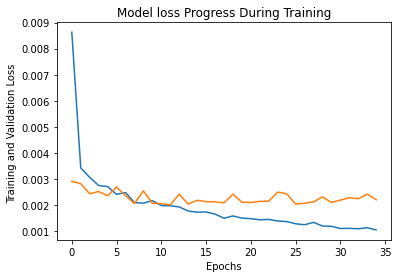

In [1133]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Loss ')

Text(0, 0.5, 'True Values')

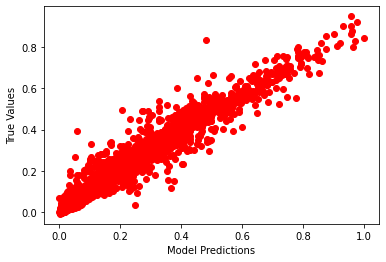

In [1134]:
#Predict based on trained model
Y_predict = model.predict(X_test)
plt.plot(Y_test, Y_predict, 'o', color='r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [1135]:
Y_predict_orig = scaler.inverse_transform(Y_predict)

In [1136]:
Y_test_orig = scaler.inverse_transform(Y_test)

Text(0, 0.5, 'True Values')

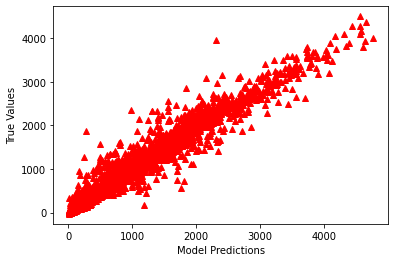

In [1137]:
plt.plot(Y_test_orig, Y_predict_orig, '^', color='r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [1138]:
n = len(X_test)
n

2991

In [1139]:
K = X_test.shape[1]
K

45

In [1140]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(Y_test_orig, Y_predict_orig)), '0.3f'))
RMSE

206.206

In [1141]:
MSE = mean_squared_error(Y_test_orig, Y_predict_orig)
MAE = mean_absolute_error(Y_test_orig, Y_predict_orig)
r2= r2_score(Y_test_orig, Y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-K-1)

In [1142]:
print('RMSE =', RMSE, '\nMSE =', MSE, '\nMAE =',  MAE, '\nr2 = ', r2, '\nAdjusted r2 =', adj_r2)

RMSE = 206.206 
MSE = 42521.08470767817 
MAE = 125.12729650114102 
r2 =  0.9470882271878892 
Adjusted r2 = 0.9462797281126617


In [1143]:
model.evaluate(X_test, Y_test, verbose=1,)

94/94 [==============================] - 0s 2ms/step - loss: 0.0019 - mae: 0.0263


[0.00187825842294842, 0.026298297569155693]

In [1144]:
model.save('Dnn_bike.h5')